In [ ]:
# Imported Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from figure_labeler import *
fl = FigureLabeler();
pd.options.mode.chained_assignment = None
import geopandas as gpd

from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')


<h1 style="text-align:center;">Visualizing the Results of the 2008 Referendum of Partitioning Quezon Province into Two Provinces</h1>
<hr>

<a name="top"></a>
#### This is a Sample of Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary
***


[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
***


[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation
***


[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
***


The datasets came from two source, the Commission on Elections for the referendum data obtained through web scraping and GADM for geographical maps to be used in the study.

_For Referendum Data_

__Source:__  https://en.wikipedia.org/wiki/2008_Quezon_del_Sur_creation_plebiscite

__Description:__ Results of the plebiscite broken down by municipality.

__Features:__ 
<ul> 
    <li>Choice: The options for voters to choose in approving or rejecting the partition (Yes and No).  </li>
    <li>Votes: Total votes obtained for an option.  </li>
    <li>%: Percentage of votes obtained for an option.  </li>
    <li>Administrative division: The municipality or city that participated in the referendum.  </li>
    <li>Yes Total: Numerical votes of Yes.  </li>
    <li>Yes %: The Yes votes expressed in percentage.  </li>
    <li>No Total: Numerical votes of No.  </li>
    <li>No %: The No votes expressed in percentage.  </li>
</ul>



[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
## Data Preprocessing
***

In [ ]:
url = 'https://en.wikipedia.org/wiki/2008_Quezon_del_Sur_creation_plebiscite'

In [ ]:
no2hati = pd.read_html(url)

In [ ]:
no2hatigen = no2hati[3]

In [ ]:
no2hatigen_fil = no2hatigen.iloc[:2].copy()
no2hatigen_fil['Votes'] = no2hatigen_fil['Votes'].astype(float)

no2hatigen_fil = no2hatigen_fil.drop(columns=['%'])

total_votes = no2hatigen_fil['Votes'].sum()
no2hatigen_fil['%'] = ((no2hatigen_fil['Votes'] / total_votes) * 100).round(2)

print("\nNew DataFrame with selected rows and recomputed percentages:")
display(no2hatigen_fil)

fl.table_caption("Choice Table Data",
                 "Table showing the choices in plebiscite and their vote counts and shares.")


New DataFrame with selected rows and recomputed percentages:


,Choice,Votes,%
0,No,205265.0,56.59
1,Yes,157457.0,43.41


In [ ]:
vote_details = no2hatigen.iloc[3:7].copy()
vote_details['Votes'] = vote_details['Votes'].astype(float)
vote_details['%'] = vote_details['%'].astype(float)

print("\nNew DataFrame with selected rows:")
display(vote_details)

fl.table_caption("Voter Demographics Data",
                 "Table showing the vote details of the plebiscite including the electoral population and turnout.")


New DataFrame with selected rows:


,Choice,Votes,%
3,Valid votes,362722.0,99.53
4,Invalid or blank votes,1705.0,0.47
5,Total votes,364427.0,100.00
6,Registered voters/turnout,957199.0,37.89


Referendums usually have low turnouts due to factors like lack of public awareness about the process, potential disillusionment with the issue, logistical challenges in accessing polling places, and sometimes the perception that the issues at hand are less compelling.  Apathy and lack of understanding about how a referendum impacts decision-making can lower motivation to participate.

In [ ]:
no2hatimuni = no2hati[4]

In [ ]:
# Dropping all null values
no2hatimuni.dropna()

# Combining multi-index levels into one level
no2hatimuni.columns = [' '.join(col).strip() for col in no2hatimuni.columns.values]
no2hatimuni.columns = no2hatimuni.columns.str.replace(' ', '')

In [ ]:
# Renaming columns
no2hatimuni = no2hatimuni.rename(columns={
    'AdministrativedivisionAdministrativedivision': 'Administrative division',
    'AdministrativedivisionAdministrativedivision.1': 'Administrative division 1',
    'YesTotal': 'Yes Votes',
    'Yes%': 'Yes %',
    'NoTotal': 'No Votes',
    'No%': 'No %'
})

In [ ]:
# Dropping duplicate column
no2hatimuni = no2hatimuni.drop(columns=['Administrative division 1'])
no2hatimuni = no2hatimuni.drop(index=[43])
no2hatimuni = no2hatimuni.dropna()

In [ ]:
# Converting specific columns to float
columns_to_convert = ['Yes Votes', 'Yes %', 'No Votes', 'No %']
no2hatimuni[columns_to_convert] = no2hatimuni[columns_to_convert].astype(float)

In [ ]:
# Creating additional dataframes each only containing votes and percentages of votes per jurisdiction
admin_div_columns = no2hatimuni.filter(like='Administrative division')

votes_columns = no2hatimuni.filter(like='Votes')
percentages_columns = no2hatimuni.filter(like='%')

votes_df = pd.concat([admin_div_columns, votes_columns], axis=1)

percentages_df = pd.concat([admin_div_columns, percentages_columns], axis=1)

In [ ]:
print("Votes DataFrame:")
display(votes_df)

fl.table_caption("Municipalities Vote Count Data",
                 "Table showing only the vote counts of each choices in the plebiscite from each municipality/city.")

Votes DataFrame:


,Administrative division,Yes Votes,No Votes
0,Agdangan,1150.0,1862.0
1,Alabat,1610.0,2466.0
2,Atimonan,2593.0,9121.0
3,Buenavista,4067.0,3211.0
4,Burdeos,382.0,2637.0
5,Calauag,6851.0,6776.0
6,Candelaria,3463.0,10394.0
7,Catanauan,10126.0,5376.0
8,Dolores,798.0,2995.0
9,General Luna,4203.0,1688.0


In [ ]:
print("\nPercentages DataFrame:")
display(percentages_df)

fl.table_caption("Municipalities Vote Share Data",
                 "Table showing only the vote percentages of each choices in the plebiscite from each municipality/city.")


Percentages DataFrame:


,Administrative division,Yes %,No %
0,Agdangan,38.18,61.82
1,Alabat,39.50,60.50
2,Atimonan,22.14,77.86
3,Buenavista,55.88,44.12
4,Burdeos,12.65,87.35
5,Calauag,50.28,49.72
6,Candelaria,24.99,75.01
7,Catanauan,65.32,34.68
8,Dolores,21.04,78.96
9,General Luna,71.35,28.65


In [ ]:
no2hatiprops = no2hati[5]
display(no2hatiprops)

fl.table_caption("Proposed Units Vote Count Data",
                 "Table showing the vote details of each choices in the plebiscite from each proposed province.")

Proposed province                           Yes               No       
  Proposed province Proposed province.1     Total      %     Total      %
0  Quezon del Norte    Quezon del Norte   54010.0  29.97  126202.0  70.03
1    Quezon del Sur      Quezon del Sur  103447.0  56.68   79063.0  43.32
2               NaN                 NaN       NaN    NaN       NaN    NaN
3               NaN              Quezon  157457.0  43.41  205265.0  56.59

In [ ]:
# Combining multi-index levels into one level
no2hatiprops.columns = [' '.join(col).strip() for col in no2hatiprops.columns.values]
no2hatiprops.columns = no2hatiprops.columns.str.replace(' ', '')

In [ ]:
# Renaming columns
no2hatiprops = no2hatiprops.rename(columns={
    'ProposedprovinceProposedprovince': 'Proposed Province',
    'ProposedprovinceProposedprovince.1': 'Proposed Province 1',
    'YesTotal': 'Yes Votes',
    'Yes%': 'Yes %',
    'NoTotal': 'No Votes',
    'No%': 'No %'
})

In [ ]:
# Removing empty values and a duplicate column in the dataframe
no2hatiprops = no2hatiprops.drop(columns=['Proposed Province 1'])
no2hatiprops = no2hatiprops.drop(index=[3])
no2hatiprops = no2hatiprops.dropna()

In [ ]:
# Creating additional dataframes each only containing votes and percentages of votes per jurisdiction
admin_div_columns = no2hatiprops.filter(like='Proposed Province')

votes_columns = no2hatiprops.filter(like='Votes')
percentages_columns = no2hatiprops.filter(like='%')

propvotes_df = pd.concat([admin_div_columns, votes_columns], axis=1)
proppercentages_df = pd.concat([admin_div_columns, percentages_columns], axis=1)

### Geographical Maps

In [ ]:
gdf_2 = gpd.read_file(r"C:\Users\Ebo\DS162\Data-Vis\GeoPandas_Folder\Data\level_2\gadm41_PHL_2.json")

In [ ]:
# Reading the maps data of the Philippines
# Names like Quezon are common in other areas, so GID_2 is used in filtering the data since each province has unique identifiers.

gdf_que = gdf_2[gdf_2['GID_1'] == 'PHL.62_1'].copy()
display(gdf_que)

fl.table_caption("Quezon Province Map Data",
                 "Table showing the unique map details of each jurisdiction of Quezon Province.")

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
1296,PHL.62.1_1,PHL,Philippines,PHL.62_1,Quezon,NA,Agdangan,NA,NA,Bayan|Munisipyo,Municipality,45601,PH.QZ.AD,"MULTIPOLYGON (((121.91780 13.85410, 121.90510 ..."
1297,PHL.62.2_1,PHL,Philippines,PHL.62_1,Quezon,NA,Alabat,NA,NA,Bayan|Munisipyo,Municipality,45602,PH.QZ.AA,"MULTIPOLYGON (((122.06690 14.06150, 122.06080 ..."
1298,PHL.62.3_1,PHL,Philippines,PHL.62_1,Quezon,NA,Atimonan,NA,NA,Bayan|Munisipyo,Municipality,45603,PH.QZ.AI,"MULTIPOLYGON (((122.02100 13.91930, 122.03200 ..."
1299,PHL.62.4_1,PHL,Philippines,PHL.62_1,Quezon,NA,Buenavista,NA,NA,Bayan|Munisipyo,Municipality,45605,PH.QZ.BE,"MULTIPOLYGON (((122.49000 13.68530, 122.49570 ..."
1300,PHL.62.5_1,PHL,Philippines,PHL.62_1,Quezon,NA,Burdeos,NA,NA,Bayan|Munisipyo,Municipality,45606,PH.QZ.BR,"MULTIPOLYGON (((122.01930 14.80550, 122.02320 ..."
1301,PHL.62.6_1,PHL,Philippines,PHL.62_1,Quezon,NA,Calauag,NA,NA,Bayan|Munisipyo,Municipality,45607,PH.QZ.CL,"MULTIPOLYGON (((122.37720 13.89550, 122.33540 ..."
1302,PHL.62.7_1,PHL,Philippines,PHL.62_1,Quezon,NA,Candelaria,NA,NA,Bayan|Munisipyo,Municipality,45608,PH.QZ.CN,"MULTIPOLYGON (((121.40940 13.84510, 121.40970 ..."
1303,PHL.62.8_1,PHL,Philippines,PHL.62_1,Quezon,NA,Catanauan,NA,NA,Bayan|Munisipyo,Municipality,45610,PH.QZ.CT,"MULTIPOLYGON (((122.34850 13.54960, 122.33090 ..."
1304,PHL.62.9_1,PHL,Philippines,PHL.62_1,Quezon,NA,Dolores,NA,NA,Bayan|Munisipyo,Municipality,45615,PH.QZ.DL,"MULTIPOLYGON (((121.38370 13.97870, 121.33810 ..."
1305,PHL.62.10_1,PHL,Philippines,PHL.62_1,Quezon,NA,GeneralLuna,NA,NA,Bayan|Munisipyo,Municipality,45616,PH.QZ.GL,"MULTIPOLYGON (((122.20110 13.63330, 122.20250 ..."


In [ ]:
# There are 42 towns/cities in the list, but officially there are only 41.
# The multipolygon details of 'Hinunangan' seems quite far from other towns in Quezon, which mostly range from 121-122, but Hinunangan is at 125, so it needs to be removed.
gdf_que2 = gdf_que[~gdf_que['NAME_2'].str.contains('Hinunangan')].copy()
gdf_que2 = gdf_que2[['GID_2', 'NAME_2', 'geometry']].copy()

In [ ]:
# Resetting the index of gdf_que2 to be able to be merged from another dataset
gdf_que2_res = gdf_que2.reset_index(drop=True)

In [ ]:
# Merging the dataframes without specifying a common column
merged_df = pd.concat([no2hatimuni, gdf_que2_res], axis=1).copy()

# Rearranging the columns
merged_df = merged_df[['GID_2', 'NAME_2', 'Administrative division', 'Yes Votes', 'No Votes', 'Yes %', 'No %', 'geometry']]

# Removing the 'City' word in 'Administrative division' column
merged_df['Administrative division'] = merged_df['Administrative division'].str.replace(' City', '')

display(merged_df)
fl.table_caption("Merged Data",
                 "Table showing the combined vote details of each choices in the plebiscite and map details from each municipality/city.")

,GID_2,NAME_2,Administrative division,Yes Votes,No Votes,Yes %,No %,geometry
0,PHL.62.1_1,Agdangan,Agdangan,1150.0,1862.0,38.18,61.82,"MULTIPOLYGON (((121.91780 13.85410, 121.90510 ..."
1,PHL.62.2_1,Alabat,Alabat,1610.0,2466.0,39.50,60.50,"MULTIPOLYGON (((122.06690 14.06150, 122.06080 ..."
2,PHL.62.3_1,Atimonan,Atimonan,2593.0,9121.0,22.14,77.86,"MULTIPOLYGON (((122.02100 13.91930, 122.03200 ..."
3,PHL.62.4_1,Buenavista,Buenavista,4067.0,3211.0,55.88,44.12,"MULTIPOLYGON (((122.49000 13.68530, 122.49570 ..."
4,PHL.62.5_1,Burdeos,Burdeos,382.0,2637.0,12.65,87.35,"MULTIPOLYGON (((122.01930 14.80550, 122.02320 ..."
5,PHL.62.6_1,Calauag,Calauag,6851.0,6776.0,50.28,49.72,"MULTIPOLYGON (((122.37720 13.89550, 122.33540 ..."
6,PHL.62.7_1,Candelaria,Candelaria,3463.0,10394.0,24.99,75.01,"MULTIPOLYGON (((121.40940 13.84510, 121.40970 ..."
7,PHL.62.8_1,Catanauan,Catanauan,10126.0,5376.0,65.32,34.68,"MULTIPOLYGON (((122.34850 13.54960, 122.33090 ..."
8,PHL.62.9_1,Dolores,Dolores,798.0,2995.0,21.04,78.96,"MULTIPOLYGON (((121.38370 13.97870, 121.33810 ..."
9,PHL.62.10_1,GeneralLuna,General Luna,4203.0,1688.0,71.35,28.65,"MULTIPOLYGON (((122.20110 13.63330, 122.20250 ..."


In [ ]:
# Creating a new column containing which provinces each units would be part of if referendum is approved

proposed_province_mapping = {
    'Agdangan': 'Quezon del Sur',
    'Alabat': 'Quezon del Sur',
    'Atimonan': 'Quezon del Sur',
    'Buenavista': 'Quezon del Sur',
    'Burdeos': 'Quezon del Norte',
    'Calauag': 'Quezon del Sur',
    'Candelaria': 'Quezon del Norte',
    'Catanauan': 'Quezon del Sur',
    'Dolores': 'Quezon del Norte',
    'General Luna': 'Quezon del Sur',
    'General Nakar': 'Quezon del Norte',
    'Guinayangan': 'Quezon del Sur',
    'Gumaca': 'Quezon del Sur',
    'Infanta': 'Quezon del Norte',
    'Jomalig': 'Quezon del Norte',
    'Lopez': 'Quezon del Sur',
    'Lucban': 'Quezon del Norte',
    'Lucena': 'Quezon del Norte',
    'Macalelon': 'Quezon del Sur',
    'Mauban': 'Quezon del Norte',
    'Mulanay': 'Quezon del Sur',
    'Padre Burgos': 'Quezon del Sur',
    'Pagbilao': 'Quezon del Norte',
    'Panukulan': 'Quezon del Norte',
    'Patnanungan': 'Quezon del Norte',
    'Perez': 'Quezon del Sur',
    'Plaridel': 'Quezon del Sur',
    'Pitogo': 'Quezon del Sur',
    'Polillo': 'Quezon del Norte',
    'Quezon': 'Quezon del Sur',
    'Real': 'Quezon del Norte',
    'Sampaloc': 'Quezon del Norte',
    'San Andres': 'Quezon del Sur',
    'San Antonio': 'Quezon del Norte',
    'San Francisco': 'Quezon del Sur',
    'San Narciso': 'Quezon del Sur',
    'Sariaya': 'Quezon del Norte',
    'Tagkawayan': 'Quezon del Sur',
    'Tayabas': 'Quezon del Norte',
    'Tiaong': 'Quezon del Norte',
    'Unisan': 'Quezon del Sur'
    }

merged_df['Proposed Province'] = merged_df['Administrative division'].map(proposed_province_mapping).fillna('Unknown')
display(merged_df)

fl.table_caption("Merged Data with Additional Column",
                 "Table showing the merged data from each municipality/city, but also including the proposed province of which each municipality/city would be part of if approved.")

,GID_2,NAME_2,Administrative division,Yes Votes,No Votes,Yes %,No %,geometry,Proposed Province
0,PHL.62.1_1,Agdangan,Agdangan,1150.0,1862.0,38.18,61.82,"MULTIPOLYGON (((121.91780 13.85410, 121.90510 ...",Quezon del Sur
1,PHL.62.2_1,Alabat,Alabat,1610.0,2466.0,39.50,60.50,"MULTIPOLYGON (((122.06690 14.06150, 122.06080 ...",Quezon del Sur
2,PHL.62.3_1,Atimonan,Atimonan,2593.0,9121.0,22.14,77.86,"MULTIPOLYGON (((122.02100 13.91930, 122.03200 ...",Quezon del Sur
3,PHL.62.4_1,Buenavista,Buenavista,4067.0,3211.0,55.88,44.12,"MULTIPOLYGON (((122.49000 13.68530, 122.49570 ...",Quezon del Sur
4,PHL.62.5_1,Burdeos,Burdeos,382.0,2637.0,12.65,87.35,"MULTIPOLYGON (((122.01930 14.80550, 122.02320 ...",Quezon del Norte
5,PHL.62.6_1,Calauag,Calauag,6851.0,6776.0,50.28,49.72,"MULTIPOLYGON (((122.37720 13.89550, 122.33540 ...",Quezon del Sur
6,PHL.62.7_1,Candelaria,Candelaria,3463.0,10394.0,24.99,75.01,"MULTIPOLYGON (((121.40940 13.84510, 121.40970 ...",Quezon del Norte
7,PHL.62.8_1,Catanauan,Catanauan,10126.0,5376.0,65.32,34.68,"MULTIPOLYGON (((122.34850 13.54960, 122.33090 ...",Quezon del Sur
8,PHL.62.9_1,Dolores,Dolores,798.0,2995.0,21.04,78.96,"MULTIPOLYGON (((121.38370 13.97870, 121.33810 ...",Quezon del Norte
9,PHL.62.10_1,GeneralLuna,General Luna,4203.0,1688.0,71.35,28.65,"MULTIPOLYGON (((122.20110 13.63330, 122.20250 ...",Quezon del Sur


In [ ]:
# Creating a new DataFrame with province, geometry, vote shares, and the geometry
town_share_df = merged_df

town_share_df['Winner'] = town_share_df[['Yes %', 'No %']].idxmax(axis=1)
town_share_df['Winner Share'] = town_share_df[['Yes %', 'No %']].max(axis=1)

town_share_df = town_share_df[['NAME_2', 'Administrative division', 'Yes %', 'No %', 'Winner', 'Winner Share', 'geometry']]

<a name="dat_expl"></a>
## Data Exploration
***



In [ ]:
sns.set_theme(context='notebook', style='whitegrid', palette='deep', font_scale=1, color_codes=True, rc=None)

# Setting the font of visuals into Gotham
plt.rcParams['font.family'] = 'Gotham'

In [ ]:
# Determining the vote details' percentages
total_votes = vote_details[vote_details['Choice'] == 'Total votes']['Votes'].iloc[0]
registered_voters = vote_details[vote_details['Choice'] == 'Registered voters/turnout']['Votes'].iloc[0]
turnout_percentage = ((total_votes / registered_voters) * 100).round(2)
non_voters_percentage = 100 - turnout_percentage

percentage_data = pd.DataFrame({
    'Choice': ['Turnout', 'Did not participate'],
    'Votes': [turnout_percentage, non_voters_percentage]
})

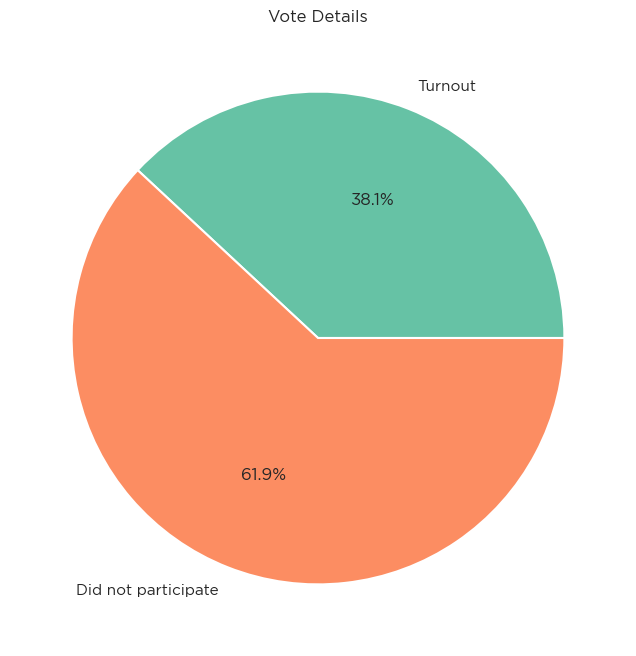

In [ ]:
plt.figure(figsize=(8, 8))
sns.set_palette("Set2")

plt.pie(percentage_data['Votes'], labels=percentage_data['Choice'], autopct='%1.1f%%',
        wedgeprops=dict(edgecolor='white', linewidth=1.5))

plt.title('Vote Details')
plt.savefig('piechart.png', dpi=600)
plt.show()

fl.fig_caption("Vote Details Chart",
               "Visualization of voting turnouts in the referendum.")

The referendum only garnered 38.1% voter turnout among Quezon voters (voters registered anywhere in Quezon Province), with the remaining 61.9% not participating.

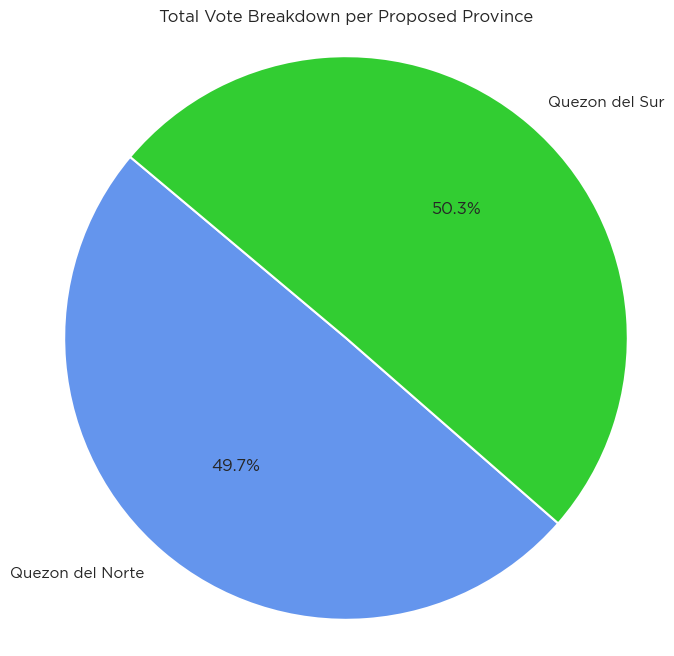

In [ ]:
# Plotting the choices' votes
plt.figure(figsize=(8, 8))
colors = ['cornflowerblue', 'limegreen']
sns.set_palette(sns.color_palette(colors))

propvotes_df['Total Votes'] = propvotes_df['Yes Votes'] + propvotes_df['No Votes']
total_votes_per_province = propvotes_df.groupby('Proposed Province')['Total Votes'].sum().reset_index()

custom_labels = ['Quezon del Norte', 'Quezon del Sur']

plt.pie(total_votes_per_province['Total Votes'], labels=custom_labels, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(edgecolor='white', linewidth=1.5))

plt.title('Total Vote Breakdown per Proposed Province')
plt.axis('equal')
plt.savefig('piechart1.png', dpi=600)

plt.show()

fl.fig_caption("Proposed Province Vote Share Chart",
               "Visualization of vote shares of each proposed province in the referendum.")

This chart visualizes the valid votes broken down by proposed provinces. In the chart, 50.3% of the votes came from towns that would be part of the proposed Quezon del Sur, while the remaining 49.7% of the votes came from the towns that would be part of the proposed Quezon del Norte.

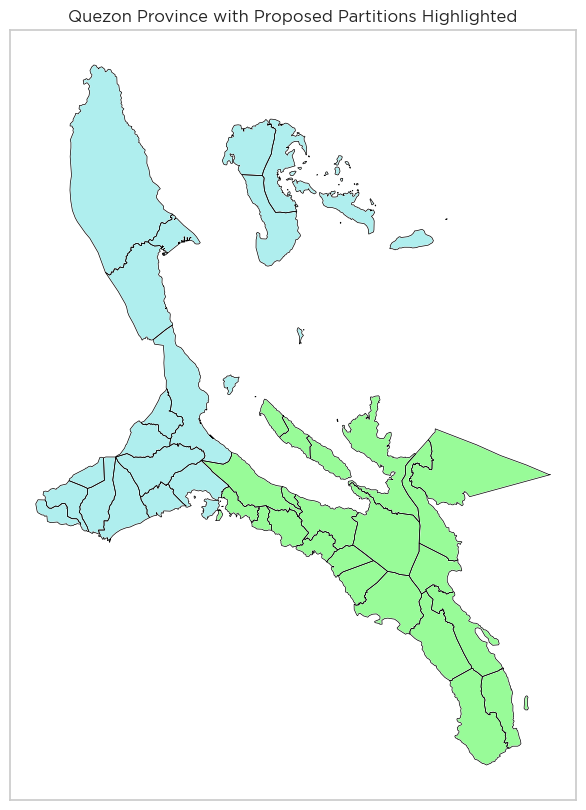

In [ ]:
# Load the entire map of Quezon province
quezon_map = gpd.read_file(r"C:\Users\Ebo\DS162\Data-Vis\Trial_maps\quezonmap.json")

# Load the file containing Quezon del Norte
quezon_del_norte = gpd.read_file(r"C:\Users\Ebo\DS162\Data-Vis\Trial_maps\quedelnor.json")

# Load the file containing Quezon del Sur
quezon_del_sur = gpd.read_file(r"C:\Users\Ebo\DS162\Data-Vis\Trial_maps\quedelsur.json")

# Plot the entire map of Quezon province
quezon_map.boundary.plot(figsize=(10, 10), edgecolor='black', linewidth=0.5)

# Plot Quezon del Norte
quezon_del_norte.plot(ax=plt.gca(), color='paleturquoise', legend=True)

# Plot Quezon del Sur
quezon_del_sur.plot(ax=plt.gca(), color='palegreen', legend=True)

plt.xticks([])
plt.yticks([])
plt.title("Quezon Province with Proposed Partitions Highlighted")
plt.savefig('quezonpartedmap.png', dpi=600)

plt.show()
fl.fig_caption("Quezon Map with Two Proposed Provinces",
               "Map showing the two provinces should the referendum push through.")

This map chart visualizes Quezon Province, with two colors highlighting the would-be provinces of Quezon del Norte and del Sur. Quezon del Norte is highlighted in turquoise, while Quezon del Sur is highlighted in pale green. 

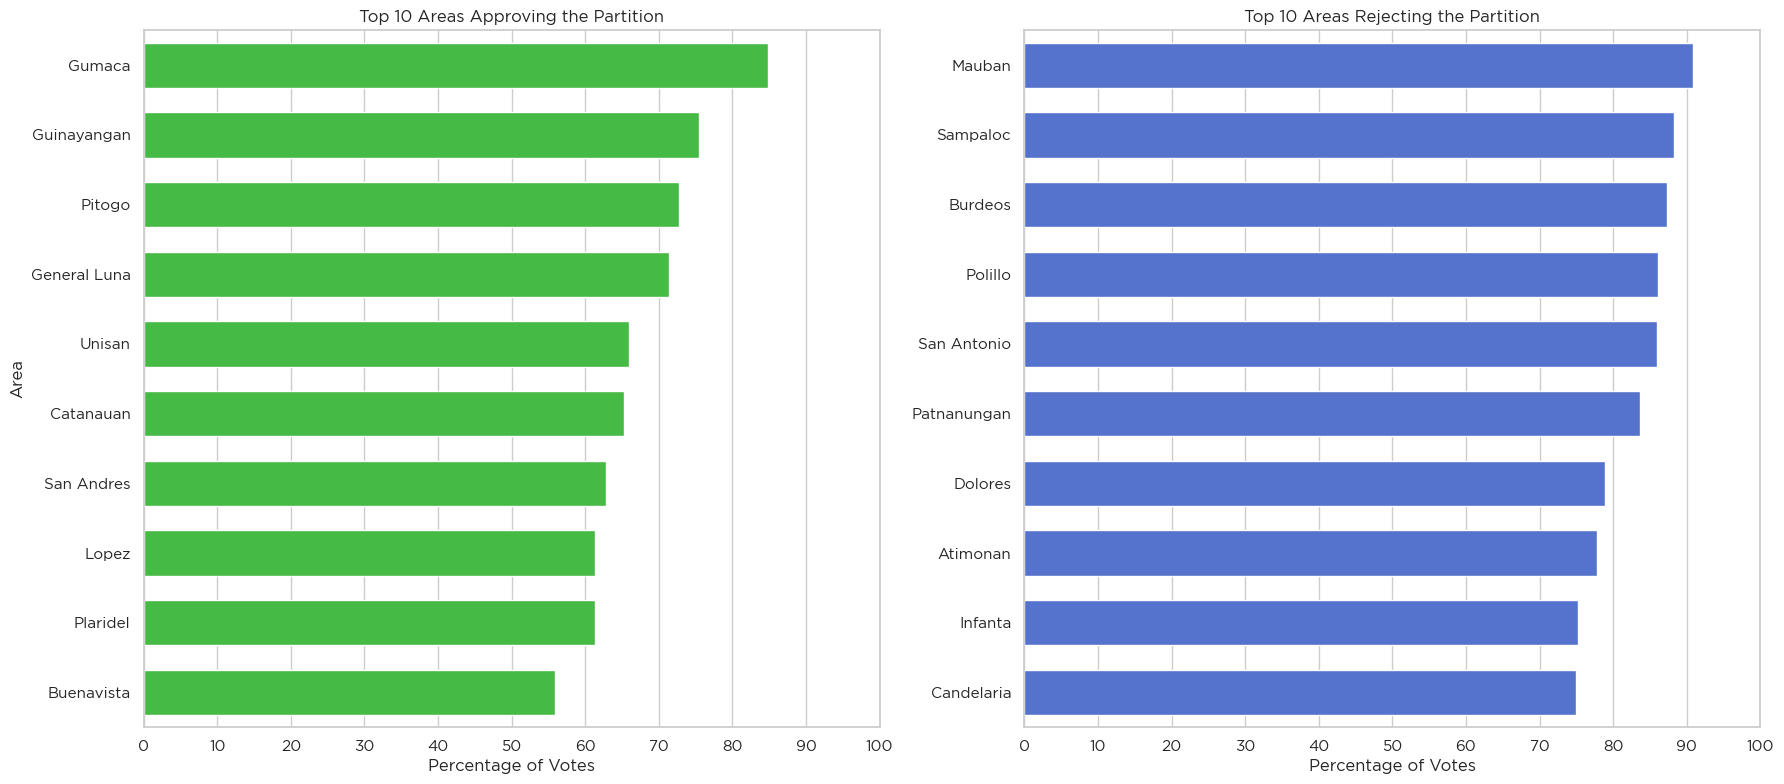

In [ ]:
# Filtering the top 10 towns by shares of yes and no votes
top_10_yes = merged_df.sort_values(by='Yes %', ascending=False).head(10)
top_10_no = merged_df.sort_values(by='No %', ascending=False).head(10)

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plotting top 10 towns with the highest Yes votes
sns.barplot(x='Yes %', y='Administrative division', data=top_10_yes, ax=axs[0], color='limegreen', width=0.65)
axs[0].set_title('Top 10 Areas Approving the Partition')
axs[0].set_xlabel('Percentage of Votes')
axs[0].set_ylabel('Area')
axs[0].set_xlim(0, 100)

axs[0].set_xticks(range(0, 101, 10))
axs[0].set_xticklabels([str(i) for i in range(0, 101, 10)])
axs[0].set_yticklabels(top_10_yes['Administrative division'])

# Plotting top 10 towns with the highest No votes
sns.barplot(x='No %', y='Administrative division', data=top_10_no, ax=axs[1], color='royalblue', width=0.65)
axs[1].set_title('Top 10 Areas Rejecting the Partition')
axs[1].set_xlabel('Percentage of Votes')
axs[1].set_xlim(0, 100)
axs[1].set_ylabel('')

axs[1].set_xticks(range(0, 101, 10))
axs[1].set_xticklabels([str(i) for i in range(0, 101, 10)])
axs[1].set_yticklabels(top_10_no['Administrative division'])

plt.savefig('yes_and_no_top10que.png', bbox_inches='tight', pad_inches=0.125, dpi=600)

plt.tight_layout()
plt.show()

fl.fig_caption("Top 10 Highest Choices' Vote Share Chart",
               "Bar chart visualization of ten towns/municipalities with the highest vote shares of approve/reject options in the referendum.")

This bar chart shows ten areas with the highest yes/no vote shares. In the votes affirming the partition (yes), Gumaca gained the highest, with the 'yes' garnering 80-90% of the vote, the town would be the capital of the proposed Quezon del Sur. Its neighboring town Lopez garnered more than 60% of the affirming vote.

However, the chart showing the highest rejecting votes (no) had a more solid finding. The highest 'no' vote came from Mauban, higher than Gumaca, with more then 90% of the vote. 

The top 10 highest yes votes range from between 55%-85%, while the highest no votes range from 75%-90%, suggesting a more solid vote for the 'no' side.

In [ ]:
# Creating separate datasets for each proposed province
merged_dfnor = merged_df[merged_df['Proposed Province'] == 'Quezon del Norte'].copy()
merged_dfsur = merged_df[merged_df['Proposed Province'] == 'Quezon del Sur'].copy()

In [1]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, edgecolor='black', linewidth=0.5, color='silver')

top_10_areas[top_10_areas['Administrative division'].isin(top_10_yes['Administrative division'])].plot(ax=plt.gca(),
                                                                                                       color='limegreen',
                                                                                                       edgecolor='black',
                                                                                                       linewidth=0.5,
                                                                                                       legend=True)

top_10_areas[top_10_areas['Administrative division'].isin(top_10_no['Administrative division'])].plot(ax=plt.gca(),
                                                                                                      color='cornflowerblue',
                                                                                                      edgecolor='black',
                                                                                                      linewidth=0.5,
                                                                                                      legend=True)

quezon_del_norte.boundary.plot(ax=ax, color=None, edgecolor='navy', linewidth=1.5)
quezon_del_sur.boundary.plot(ax=ax, color=None, edgecolor='darkgreen', linewidth=1.5)

# Add labels to the towns
for idx, row in top_10_areas.iterrows():
    plt.annotate(text=row['Administrative division'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 xytext=(3, 3), textcoords='offset points', fontsize=8, color='black')

plt.xticks([])
plt.yticks([])

plt.title("Top 10 Areas for Yes and No Votes")
plt.savefig('top_10_areas_map.png', bbox_inches='tight', pad_inches=0.125, dpi=300)

plt.show()
fl.fig_caption("Top 10 Choice Vote Share Map",
               "Map visualization showing municipalities with the highest vote shares of approve (green)/reject (blue) option in the referendum.")

NameError: name 'plt' is not defined

The map shows the Quezon del Norte with blue borders and Quezon del Sur in green borders, with the fill colors of lighter blue showing the towns with the highest no votes and the lighter green ones showing those with the highest yes votes.

The yes votes are all within Quezon del Sur, however, one town in the said proposed province is one of the highest no voters. The no votes are all within Quezon del Norte and Atimonan (a town filled in lighter blue and green border). In the bar chart, Atimonan voters chose 'no' vote in supermajority (greater than 67%), at almost 80%.

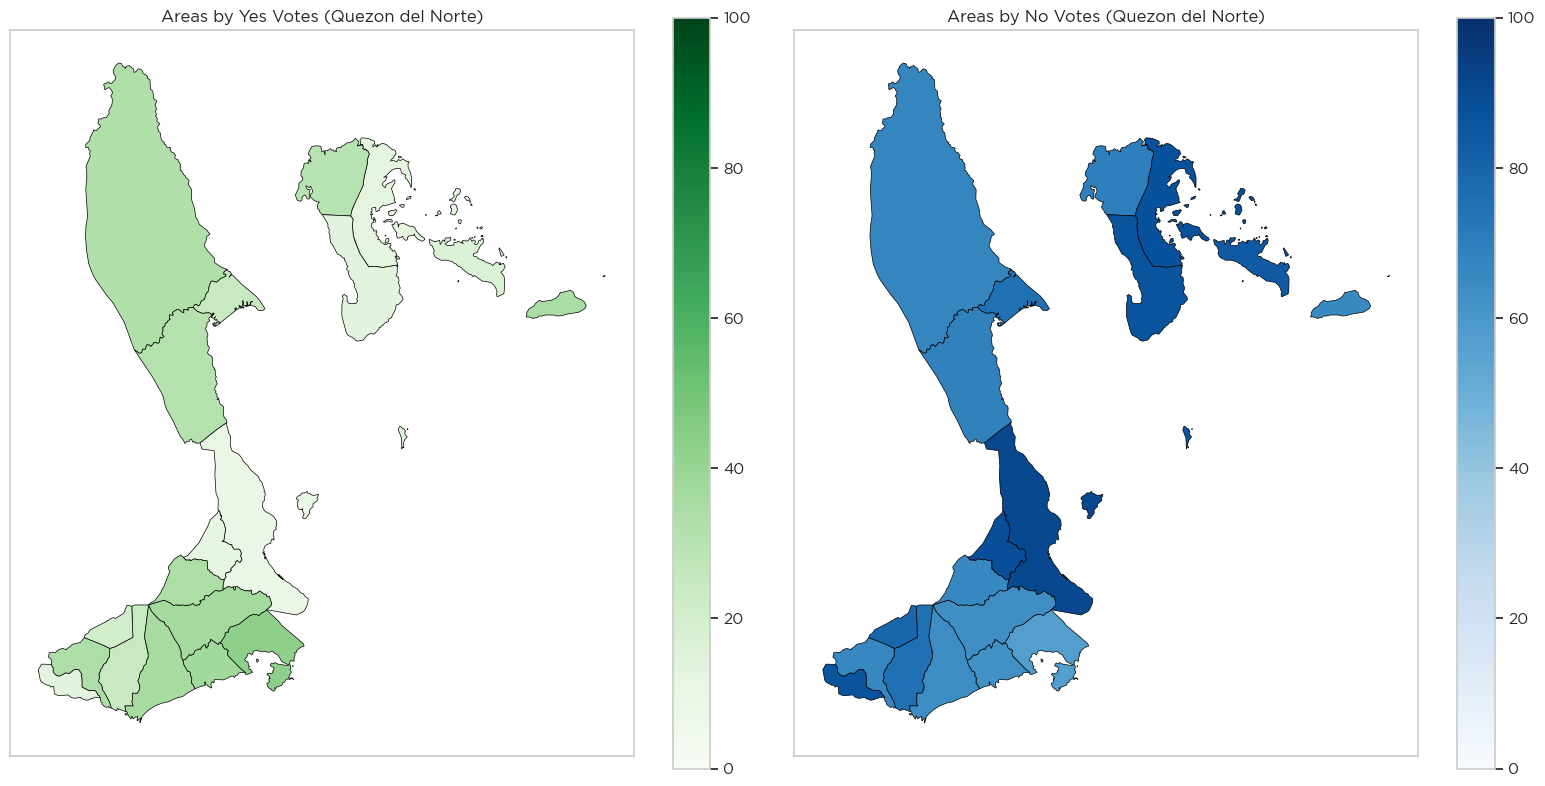

In [ ]:
# Plotting the map (for Quezon del Norte)
gdf = gpd.GeoDataFrame(merged_dfnor)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
gdf.plot(column='Yes %', ax=axs[0], cmap='Greens', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[0].set_title("Areas by Yes Votes (Quezon del Norte)")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Manually customizing colorbar for the first plot
sm1 = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=100))
sm1._A = []
cbar1 = fig.colorbar(sm1, ax=axs[0], orientation='vertical')
cbar1.set_ticks([0, 20, 40, 60, 80, 100])

gdf.plot(column='No %', ax=axs[1], cmap='Blues', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[1].set_title("Areas by No Votes (Quezon del Norte)")
axs[1].set_xticks([])
axs[1].set_yticks([])

# Manually customizing colorbar for the second plot
sm2 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=100))
sm2._A = []
cbar2 = fig.colorbar(sm2, ax=axs[1], orientation='vertical')
cbar2.set_ticks([0, 20, 40, 60, 80, 100])

# Save the plot
plt.tight_layout()
plt.savefig('yesandnovotesqdn.png', bbox_inches='tight', pad_inches=0.125, dpi=600)
plt.show()

fl.fig_caption("Quezon del Norte Vote Share Map",
               "Map visualization showing municipalities/cities of the proposed Quezon del Norte with their vote shares of approve (green)/reject (blue) option in the referendum.")

The map shows towns of Quezon del Norte by yes and no vote shares. Yes votes across all towns are fairly light, while the no votes are much darker, though towns in the southcentral part have a bit darker green shades, suggesting higher approving votes to cut the province into two.

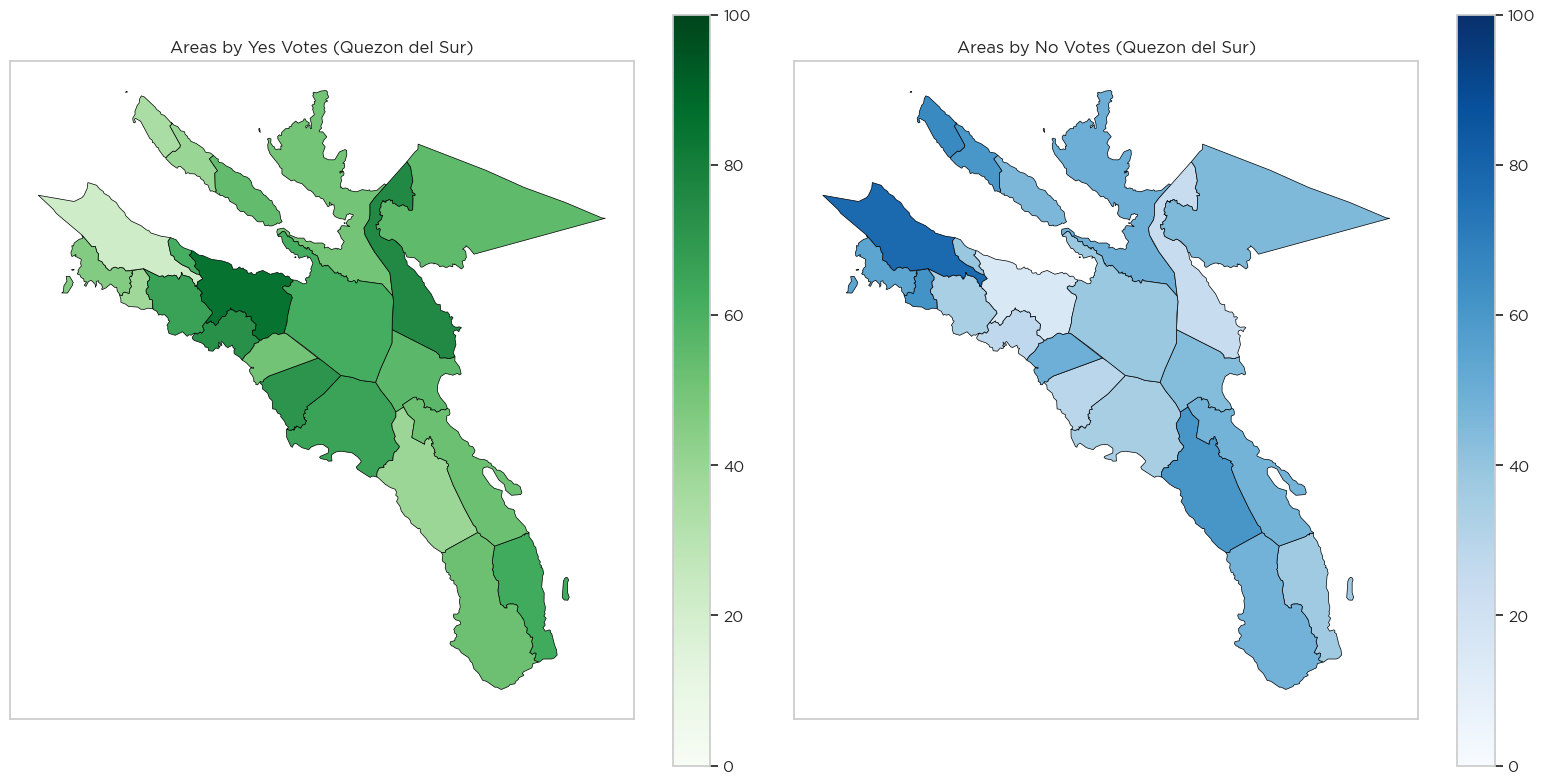

In [ ]:
# Plotting the map (for Quezon del Sur)
gdf = gpd.GeoDataFrame(merged_dfsur)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
gdf.plot(column='Yes %', ax=axs[0], cmap='Greens', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[0].set_title("Areas by Yes Votes (Quezon del Sur)")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Manually customizing colorbar for the first plot
sm1 = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=100))
sm1._A = []
cbar1 = fig.colorbar(sm1, ax=axs[0], orientation='vertical')
cbar1.set_ticks([0, 20, 40, 60, 80, 100])

gdf.plot(column='No %', ax=axs[1], cmap='Blues', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[1].set_title("Areas by No Votes (Quezon del Sur)")
axs[1].set_xticks([])
axs[1].set_yticks([])

# Manually customizing colorbar for the second plot
sm2 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=100))
sm2._A = []
cbar2 = fig.colorbar(sm2, ax=axs[1], orientation='vertical')
cbar2.set_ticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()
plt.savefig('yesandnovotesqds.png', bbox_inches='tight', pad_inches=0.125, dpi=600)
plt.show()

fl.fig_caption("Quezon del Sur Vote Share Map",
               "Map visualization showing municipalities/cities of the proposed Quezon del Sur with their vote shares of approve (green)/reject (blue) option in the referendum.")

The map shows towns of Quezon del Sur by yes and no vote shares. Yes votes (green shades) across some of many of the towns are dark, though with varying intensity, the darkest yes votes is in Gumaca, the capital of Quezon del Sur, however, there are towns with dark blue shades too, including Atimonan (the darkest blue).

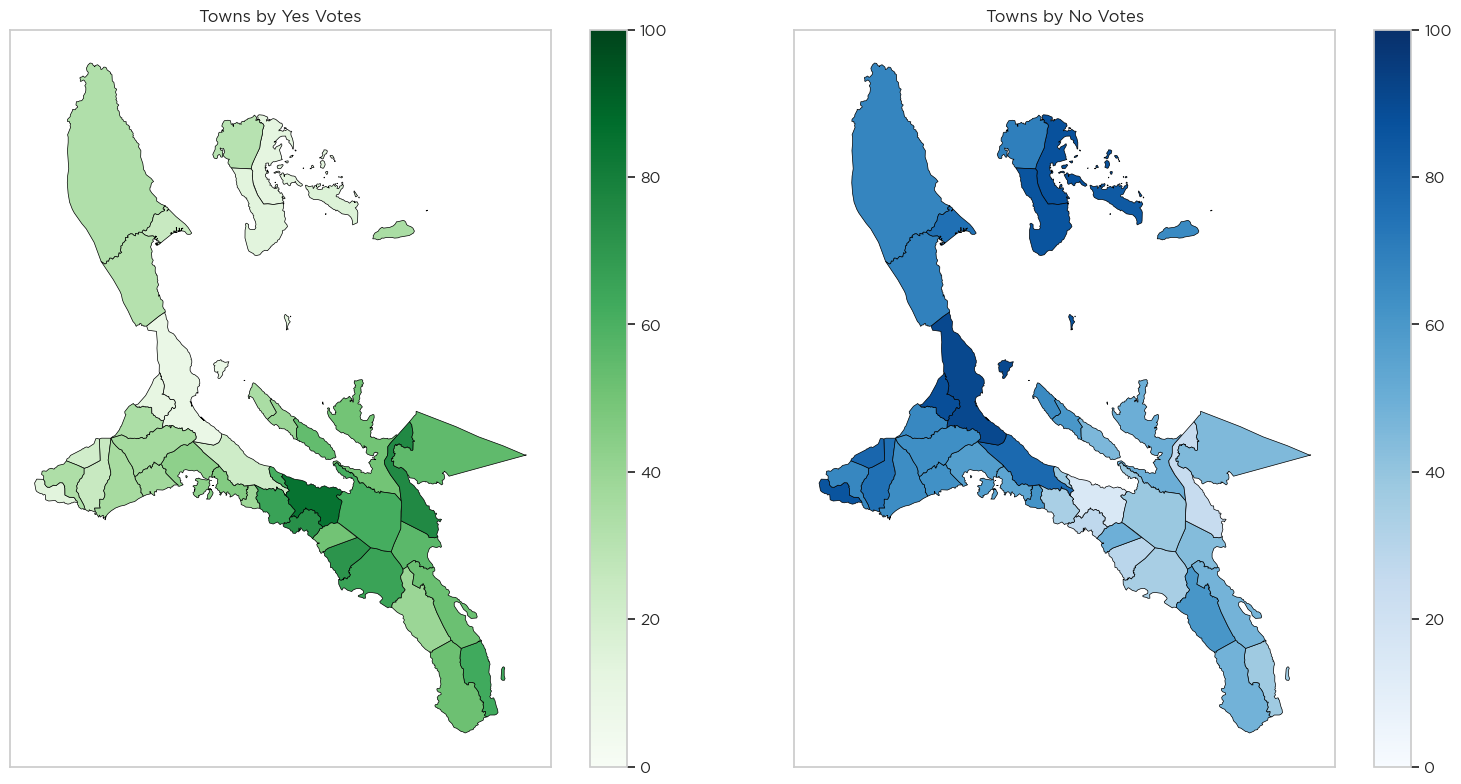

In [ ]:
# Plotting the map (for Quezon as a whole)
gdf = gpd.GeoDataFrame(merged_df)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
gdf.plot(column='Yes %', ax=axs[0], cmap='Greens', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[0].set_title("Towns by Yes Votes")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Manually customizing colorbar for the first plot
sm1 = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=100))
sm1._A = []
cbar1 = fig.colorbar(sm1, ax=axs[0], orientation='vertical')
cbar1.set_ticks([0, 20, 40, 60, 80, 100])

gdf.plot(column='No %', ax=axs[1], cmap='Blues', edgecolor='black', linewidth=0.5, vmin=0, vmax=100)
axs[1].set_title("Towns by No Votes")
axs[1].set_xticks([])
axs[1].set_yticks([])

# Manually customizing colorbar for the second plot
sm2 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=100))
sm2._A = []
cbar2 = fig.colorbar(sm2, ax=axs[1], orientation='vertical')
cbar2.set_ticks([0, 20, 40, 60, 80, 100])

# Save the plot
plt.tight_layout()
plt.savefig('yesandnovotesq.png', bbox_inches='tight', pad_inches=0.125, dpi=600)
plt.show()

fl.fig_caption("Quezon Vote Share Map",
               "Map visualization showing all municipalities/cities of Quezon Province with their vote shares of approve (green)/reject (blue) option in the referendum.")

The map shows all towns of Quezon by yes and no vote shares. Dark yes votes (green shades) are in the southern part of the province, though some of the towns have fairly same intensity as some towns in the north; the no votes are dark in the northern parts and some of the Quezon del Sur towns bordering their northern neighbors. It is noticeable that one town in the extreme south is in a dark blue on par with most of the north, which might suggest a quite strong 'no' vote among that town's voters. Some of the southern towns can be also noticed with a fairly dark blue shade, which might suggest a close call between the options.

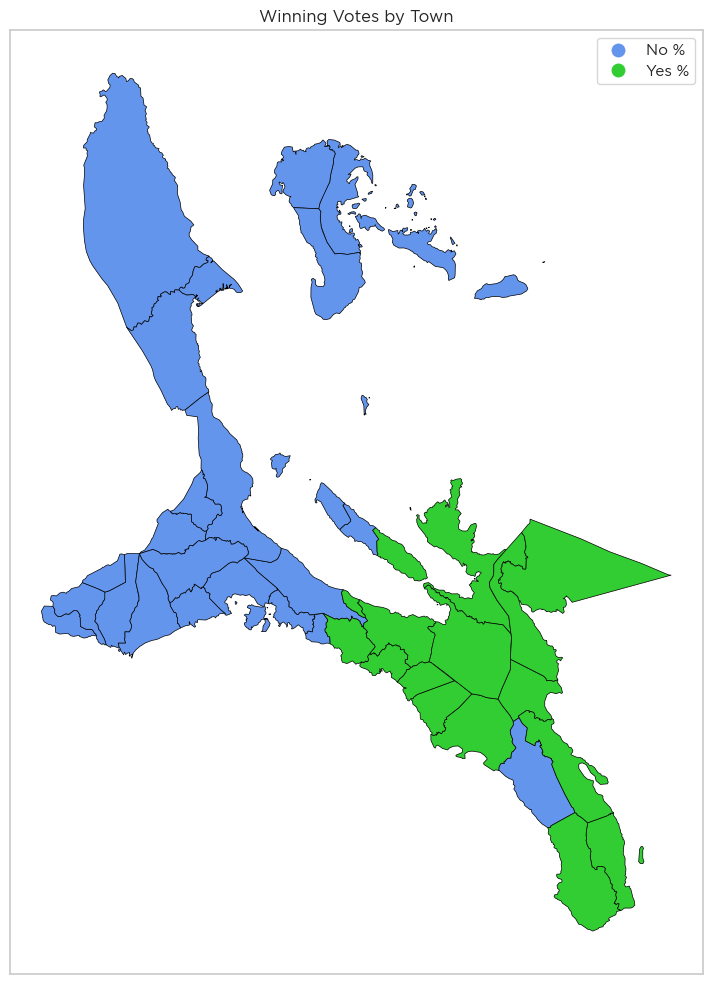

In [ ]:
gdf = gpd.GeoDataFrame(town_share_df)

# Define colors for each candidate with 'Share' included in every next candidate
colors = {'Yes %': 'limegreen', 'No %': 'cornflowerblue'}

# Create a custom colormap based on the colors dictionary
cmap = ListedColormap([colors[share] for share in town_share_df['Winner'].unique()])

# Plot the GeoDataFrame shading each province according to the winner's share of votes
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='Winner', cmap=cmap, edgecolor='black', linewidth=0.5, legend=True, ax=ax)

# Add labels, titles, etc. as needed
ax.set_title("Winning Votes by Town")

plt.xticks([])
plt.yticks([])

plt.tight_layout()

plt.savefig('quezon_referendum_winner_map.png', bbox_inches='tight', pad_inches=0.125, dpi=600)

# Show the plot
plt.show()

fl.fig_caption("Winning Choice Map",
               "Map visualization showing the winning option of each Quezon municipalities/cities in the referendum.")

The map shows all towns of Quezon by their winning options. Green color indicates a win in favor of approving the partition, while blue indicates a win for rejection. It can be noticed that Quezon del Norte towns all voted in favor of rejecting the proposal, but the approving side did not win in all towns of Quezon del Sur, with the exception of Atimonan; it can be also noticed that there is a sole blue in the extreme southern part, which is the town of Mulanay, indicating a 'no' winning choice among the town's voters.

It can also be noticed that towns in Alabat Island (long diagonal island in the center; all towns in the island are part of the proposed Quezon del Sur) did not vote in favor of approving the proposal, with two of them opposing it.

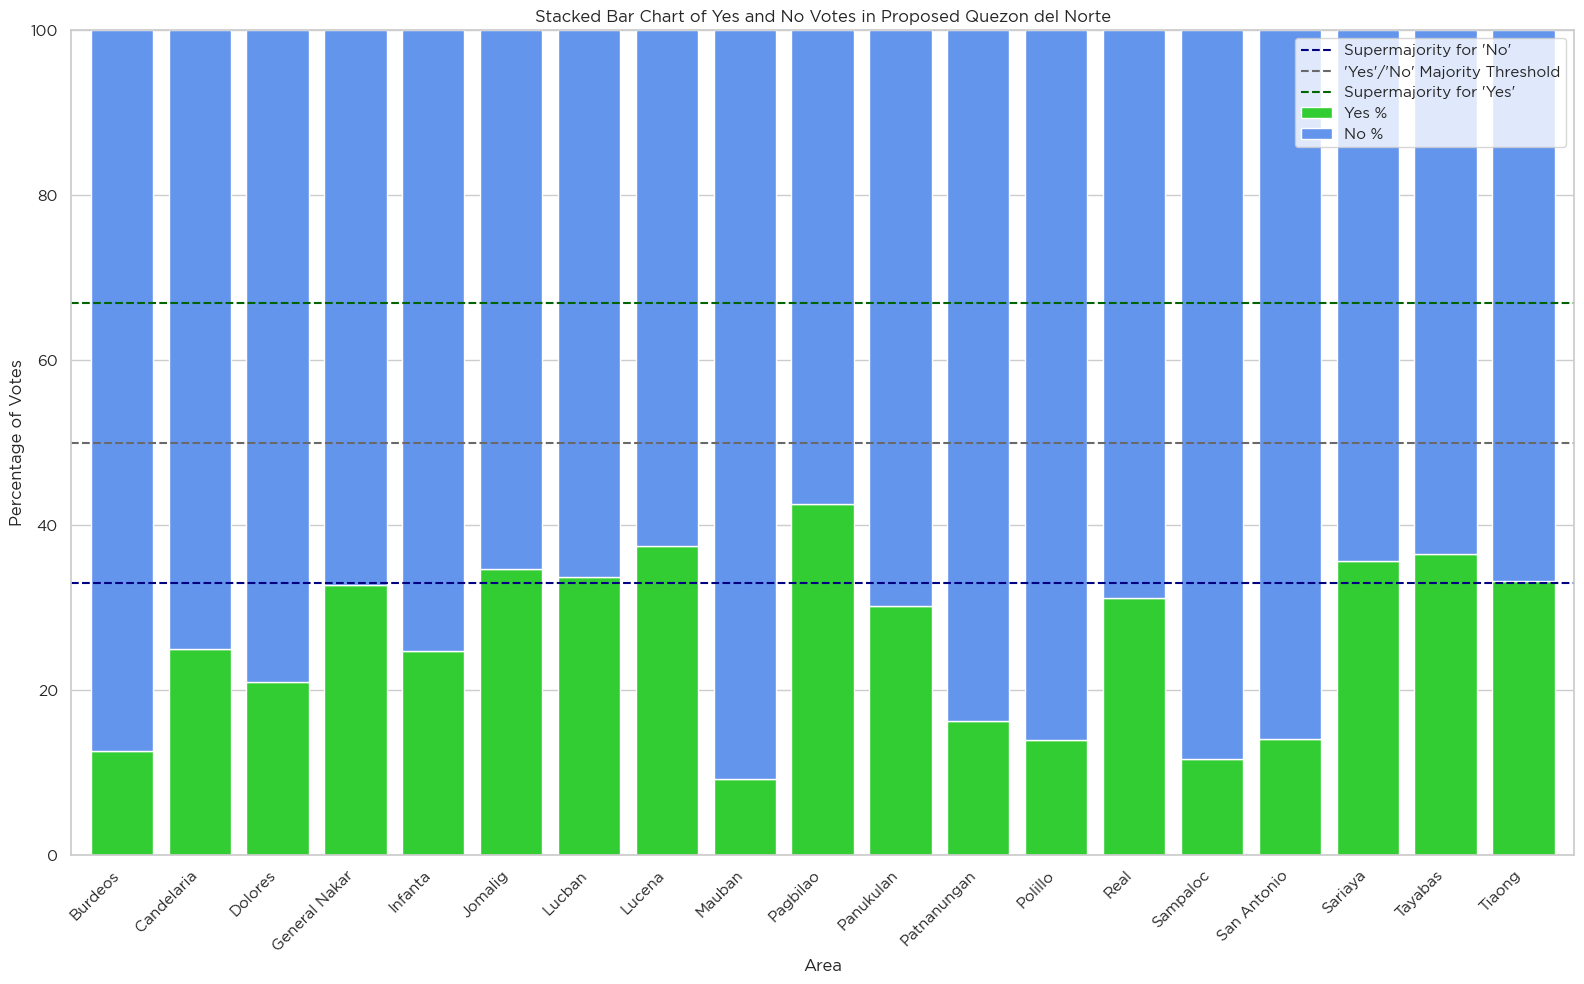

In [ ]:
data = pd.DataFrame({
    'Yes %': merged_dfnor['Yes %'],
    'No %': merged_dfnor['No %']
})

ax = data.plot(kind='bar', stacked=True, width=0.8, figsize=(16, 10), color=['limegreen', 'cornflowerblue'])
ax.set_ylim(0, 100)

plt.title('Stacked Bar Chart of Yes and No Votes in Proposed Quezon del Norte')
plt.xlabel('Area')
plt.ylabel('Percentage of Votes')

ax.set_xticklabels(merged_dfnor['Administrative division'], rotation=45, ha='right')

plt.axhline(y=33, color='navy', linestyle='--', linewidth=1.5, label="Supermajority for 'No'")
plt.axhline(y=50, color='dimgray', linestyle='--', linewidth=1.5, label="'Yes'/'No' Majority Threshold")
plt.axhline(y=67, color='darkgreen', linestyle='--', linewidth=1.5, label="Supermajority for 'Yes'")

plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('stack_qdn_ynv.png', bbox_inches='tight', pad_inches=0.125, dpi=600)

plt.show()

fl.fig_caption("Quezon del Norte Vote Share Chart",
               "Stacked bar chart (pegged at 100%) visualization showing municipalities/cities of the proposed Quezon del Norte and their vote shares of approve (green)/reject (blue) option in the referendum.")

The stacked bar chart, set at a fixed 100%, illustrates the proportion of yes and no votes in each town of Quezon del Norte. It includes dashed lines to denote thresholds for achieving majority and supermajority votes.

All towns gained majority no votes, but not all gained supermajority, where twelve out of nineteen obtained the said threshold. Seven towns did not have a supermajority vote, including the capital Lucena and the neighboring towns of Lucban, Pagbilao, Sariaya, and Tayabas, all located in the southcentral part of Quezon del Norte, the current province's most populous part.

General Nakar gained supermajority in an extremely close margin, while Tiaong did not gain supermajority though it is almost on track to garner the said threshold. Among the towns, Pagbilao gained the highest 'yes' votes, at more than 40%.

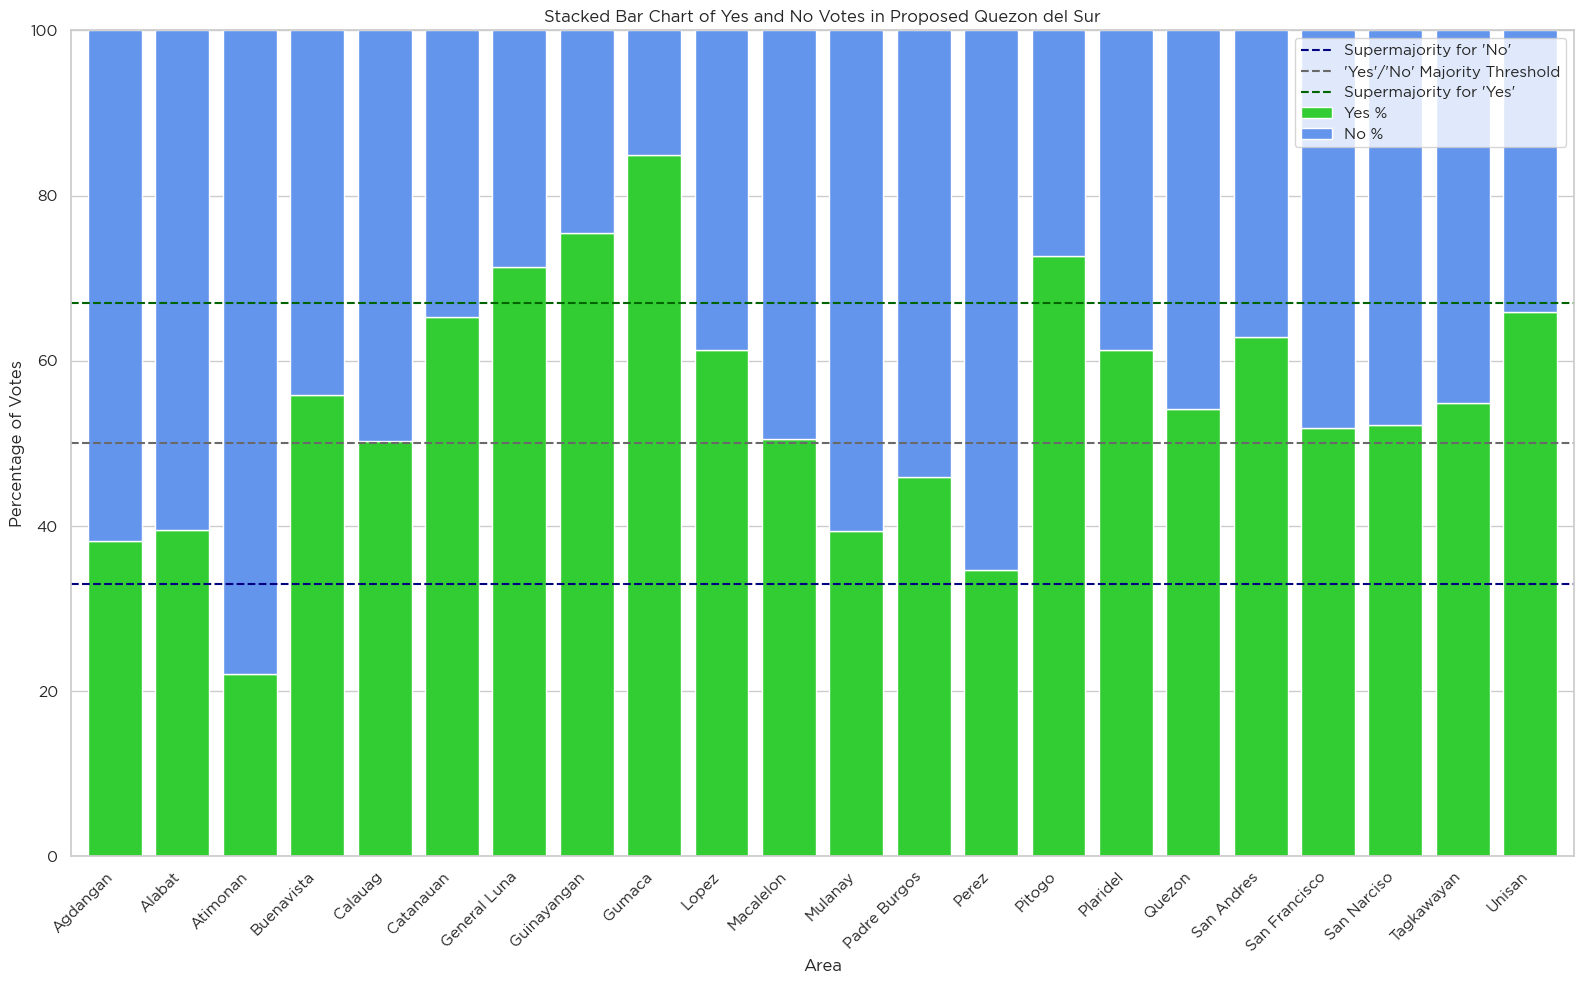

In [ ]:
data = pd.DataFrame({
    'Yes %': merged_dfsur['Yes %'],
    'No %': merged_dfsur['No %']
})

ax = data.plot(kind='bar', stacked=True, width=0.8, figsize=(16, 10), color=['limegreen', 'cornflowerblue'])
ax.set_ylim(0, 100)

plt.title('Stacked Bar Chart of Yes and No Votes in Proposed Quezon del Sur')
plt.xlabel('Area')
plt.ylabel('Percentage of Votes')

ax.set_xticklabels(merged_dfsur['Administrative division'], rotation=45, ha='right')

plt.axhline(y=33, color='navy', linestyle='--', linewidth=1.5, label="Supermajority for 'No'")
plt.axhline(y=50, color='dimgray', linestyle='--', linewidth=1.5, label="'Yes'/'No' Majority Threshold")
plt.axhline(y=67, color='darkgreen', linestyle='--', linewidth=1.5, label="Supermajority for 'Yes'")

plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('stack_qds_ynv.png', bbox_inches='tight', pad_inches=0.125, dpi=600)

plt.show()
fl.fig_caption("Quezon del Sur Vote Share Chart",
               "Stacked bar chart (pegged at 100%) visualization showing municipalities/cities of the proposed Quezon del Sur and their vote shares of approve (green)/reject (blue) option in the referendum.")

The stacked bar chart, set at a fixed 100%, illustrates the proportion of yes and no votes in each town of Quezon del Sur. It includes dashed lines to denote thresholds for achieving majority and supermajority votes.

Quezon del Sur exhibits less uniform voting patterns compared to its northern counterpart, with only four towns achieving a supermajority of 'yes' vote, opposed to the north's twelve 'no' supermajority. Opposition to the proposal (no vote) prevailed in six towns in the southern part: Atimonan, Mulanay, Agdangan, Alabat, Perez, and Mulanay. 

The proposed province also had both supermajorities from 'yes' and 'no' votes, with Gumaca leading the supermajority for 'yes' votes and Atimonan being the sole 'no' supermajority.

Close results were observed in Calauag and Macalelon, where 'yes' votes narrowly prevailed by a very small margin. Similarly, the towns of San Francisco and San Narciso on the Bondoc Peninsula experienced a tight race between 'yes' and 'no' votes, both bordering Mulanay. In contrast, Catanauan--another Bondoc Peninsula town bordering Mulanay--almost achieved a supermajority.

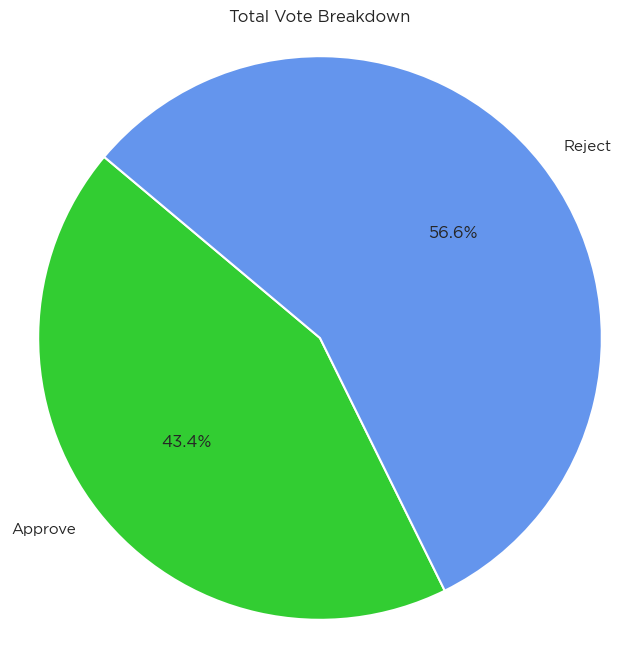

In [ ]:
# Calculate the sum of Yes Votes and No Votes separately
total_yes_votes = merged_df['Yes Votes'].sum()
total_no_votes = merged_df['No Votes'].sum()

# Define custom colors
colors = ['limegreen', 'cornflowerblue']

# Create a DataFrame for Yes and No votes
votes_data = pd.DataFrame({'Vote Type': ['Yes', 'No'], 'Total Votes': [total_yes_votes, total_no_votes]})

custom_labels = ['Approve', 'Reject']

plt.figure(figsize=(8, 8))
sns.set_palette(sns.color_palette(colors))

plt.pie(votes_data['Total Votes'], labels=custom_labels, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(edgecolor='white', linewidth=1.5))

plt.title('Total Vote Breakdown')
plt.axis('equal')
plt.savefig('piechart2.png', dpi=600)

plt.show()

fl.fig_caption("Choice Vote Share Chart",
               "Visualization of vote shares of approve/reject option in the referendum.")

The pie chart shows the percentage of votes for each options in Quezon Province (overall), the 'no' votes (Reject) garnered 56.6% of the votes, against 43.4% for 'yes' (Approve).

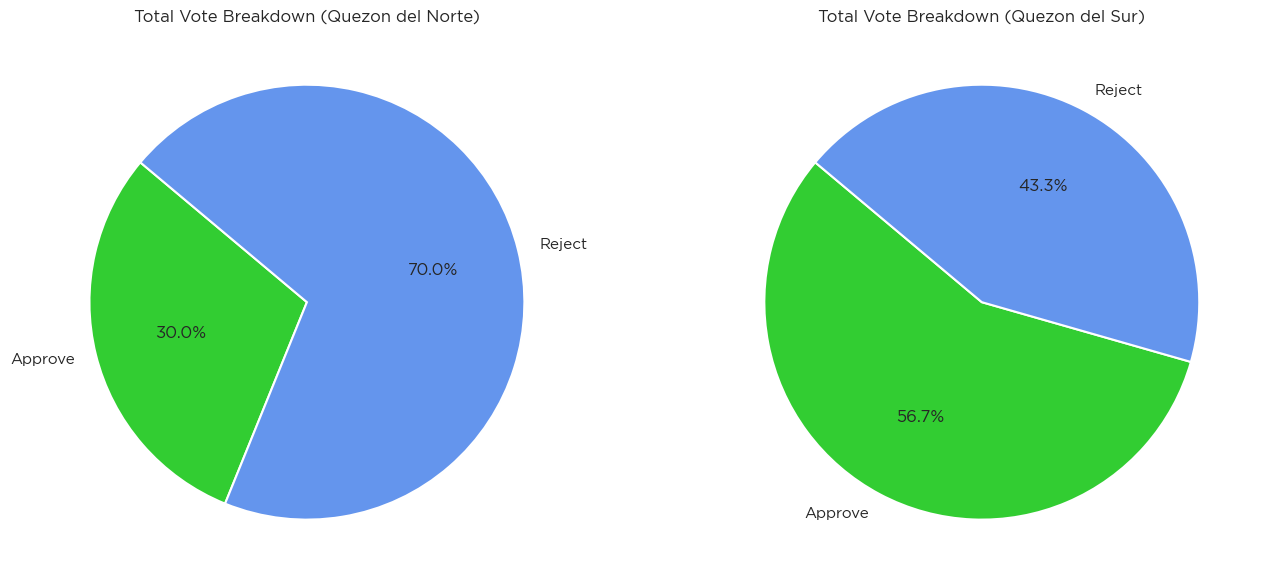

In [ ]:
# Calculate the mean of Yes Votes and No Votes separately for merged_dfnor
total_yes_votes_nor = merged_dfnor['Yes Votes'].sum()
total_no_votes_nor = merged_dfnor['No Votes'].sum()

# Calculate the mean of Yes Votes and No Votes separately for merged_dfsur
total_yes_votes_sur = merged_dfsur['Yes Votes'].sum()
total_no_votes_sur = merged_dfsur['No Votes'].sum()

# Define custom colors
colors = ['limegreen', 'cornflowerblue']

# Create a DataFrame for Yes and No votes for merged_dfnor
votes_data_nor = pd.DataFrame({'Vote Type': ['Yes %', 'No %'], 'Vote Share': [total_yes_votes_nor, total_no_votes_nor]})

# Create a DataFrame for Yes and No votes for merged_dfsur
votes_data_sur = pd.DataFrame({'Vote Type': ['Yes %', 'No %'], 'Vote Share': [total_yes_votes_sur, total_no_votes_sur]})

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for merged_dfnor
sns.set_palette(sns.color_palette(colors))
axes[0].pie(votes_data_nor['Vote Share'], labels=['Approve', 'Reject'], autopct='%1.1f%%', startangle=140,
            wedgeprops=dict(edgecolor='white', linewidth=1.5))
axes[0].set_title('Total Vote Breakdown (Quezon del Norte)')

# Plot for merged_dfsur
sns.set_palette(sns.color_palette(colors))
axes[1].pie(votes_data_sur['Vote Share'], labels=['Approve', 'Reject'], autopct='%1.1f%%', startangle=140,
            wedgeprops=dict(edgecolor='white', linewidth=1.5))
axes[1].set_title('Total Vote Breakdown (Quezon del Sur)')

# Adjust layout
plt.tight_layout()

# Save and display the plot
plt.savefig('piecharts_nor_sur.png', dpi=600)
plt.show()

fl.fig_caption("Proposed Provinces' Choice Vote Share Charts",
               "Visualization of vote shares of approve/reject option of proposed provinces in the referendum.")

The pie charts show the percentage of votes for each options in the proposed provinces.

In the proposed Quezon del Norte's towns, voters overwhelmingly chose 'no' (Reject), with 70% of the vote, opposed to almost 30% for 'yes' (Approve). In the proposed Quezon del Sur's towns, the 'yes' (Approve) and 'no' (Reject) votes have closer calls, with the former garnering 56.7% and the latter gaining 43.3%.

[ref]: #top
[Back to Table of Contents][ref]

<a name="res_dis"></a>
## Results and Discussions
***

The results from the proposed provinces of Quezon del Norte and Quezon del Sur reveal distinct patterns in voting preferences.

In Quezon del Norte, characterized by its populous towns and high electoral population, 'no' votes overwhelmingly dominated, comprising 70% of the total vote, while 'yes' votes accounted for nearly 30%. Notably, twelve towns within Quezon del Norte achieved a supermajority in favor of rejecting the proposal, reflecting a solid stance against the partition, despite lower approval votes from populous cities of Lucena, Sariaya, and Pagbilao.

Conversely, Quezon del Sur experienced a more balanced distribution of votes, with 'yes' votes securing a slight majority of 56.7% compared to 'no' votes at 43.3%. However, the southern province exhibited less uniformity in voting patterns, with only four towns achieving a supermajority in favor of approving the proposal, contrasting with the twelve towns in Quezon del Norte that reached a supermajority in favor of rejection.

Notably, six towns in Quezon del Sur where 'no' votes won, including Atimonan, border Quezon del Norte or have nautical borders with it, the latter being the case for Perez, located in the northernmost part of Alabat Island. Mulanay stands out as an exception, with all of its borders won by 'yes' votes.

Furthermore, the Bondoc Peninsula towns of San Francisco and San Narciso experienced close contests between 'yes' and 'no' votes, indicative of nuanced voting dynamics, this could also be due to their proximity to Mulanay, a sole 'no' winner in the said area. Catanauan did not follow the same pattern, as it gained an almost 'yes' supermajority, this could be due to its proximity to other high 'yes'-voting towns (such as Lopez, which had the same 'yes' voting rate as Catanauan).

Interestingly, Atimonan and Gumaca, despite their proximity to each other, had starkly contrasting results, with Atimonan gaining 'no' supermajority and Gumaca having a 'yes' supermajority, both also had the highest share of options they have won.

Overall, while Quezon del Norte demonstrated a solid preference for rejecting the proposal, Quezon del Sur showcased a more varied and balanced response, reflecting the complexity of opinions within the province.

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
***

Voting patterns in the towns of proposed provinces reveal contrasting sentiments regarding the proposed partition. In the more populous northern part, 'no' votes overwhelmingly dominated, accounting for 70% of the vote, and most of the towns achieving supermajority 'no' votes, which indicate solid stance against the partition. This is the opposite in the southern one, where 'yes' votes only secured a slight majority at 56.7% and only four towns achieving supermajority 'yes' votes.

The voting patterns were influenced by various factors, including geographical proximity, economic situations, local sentiments, and of course, endorsements from politicians and other notable personalities. Six towns in the southern part bordering the north chose 'no' votes, with Mulanay being the outlier as it is located in the extreme south of the province where towns bordering it were won by 'yes' votes. Towns bordering Mulanay, such as San Francisco and San Narciso on the Bondoc Peninsula experienced close contests between 'yes' and 'no' votes, while Atimonan and Gumaca, despite their proximity, had significantly different results, with both towns gaining supermajority in the options they have chosen or won.

It is recommended to engage in further dialogue and consultation with communities to understand the underlying reasons for their voting preferences. Continuous monitoring of socio-political dynamics and voting trends is essential to adapt strategies and ensure alignment with the evolving needs and preferences of the population.

Additionally, stakeholders and relevant authorities should exercise caution when considering the decision in partitioning Quezon Province into two separate entities. Given the notable presence of communist insurgencies in both proposed provinces, especially in the south, decisions like these might have an effect in responding to these kinds of instability and might worsen them, too. While emergencies or urgencies may necessitate such action, priority should be given to promoting development initiatives that are inclusive of all towns within the province. Development initiatives should be designed to benefit all towns, irrespective of their voting preferences, to ensure equitable access to resources and opportunities.

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

wspirat. (2023, June). _Germany Used Cars Dataset 2023_. Retrieved March 2, 2023 from https://www.kaggle.com/datasets/wspirat/germany-used-cars-dataset-2023.

[ref]: #top
[Back to Table of Contents][ref]